# Анализ рынка коммерческой недвижимости г. Житомира (2016г.)

In [2]:
import pandas as pd
import numpy as np
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('Zhitomir.csv', sep=';')

### Расшифровка названий столбцов:
Price per sq m - цена объекта недвижимости за 1 кв.м, долл. США;

City zone - расположение объекта недвижимости в городе (центр, середина, периферия);

Technical condition - состояние объекта недвижимости (очень хорошее, хорошее, удовлетворительное (приемлемое), плохое);

Basement fraction - доля подвальных(полуподвальных) помещений в общей площади объекта недвижимости;

Local conditions - привлекательность локального расположения (привлекательное, среднее, непривлекательное);

Use	- функциональное использование объекта недвижимости (офисное - 0, торговое - 1);

Total area - общая площадь объекта недвижимости, кв.м.

In [4]:
df.shape

(66, 7)

In [5]:
df.head()

,Price per sq m,City zone,Technical condition,Basement fraction,Local conditions,Use,Total area
0,746.22,central,good,0.00,good,0,550.0
1,322.90,middle,bad,0.31,good,1,703.0
2,367.65,middle,bad,0.00,average,1,340.0
3,976.19,central,good,0.00,good,0,42.0
4,385.71,middle,good,0.00,average,0,700.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66 entries, 0 to 65
Data columns (total 7 columns):
Price per sq m         66 non-null float64
City zone              66 non-null object
Technical condition    66 non-null object
Basement fraction      66 non-null float64
Local conditions       66 non-null object
Use                    66 non-null int64
Total area             66 non-null float64
dtypes: float64(3), int64(1), object(3)
memory usage: 3.7+ KB


In [3]:
df.columns

Index(['Price per sq m', 'City zone', 'Technical condition',
       'Basement fraction', 'Local conditions', 'Use', 'Total area'],
      dtype='object')

Заменим пробелы на подчеркивания в названияих столбцов:

In [4]:
df.columns = df.columns.map(lambda x: x.replace(' ', '_'))

In [5]:
df.columns

Index(['Price_per_sq_m', 'City_zone', 'Technical_condition',
       'Basement_fraction', 'Local_conditions', 'Use', 'Total_area'],
      dtype='object')

Наименования категорий, описывающих свойства объектов:

In [6]:
df['City_zone'].unique()

array(['central', 'middle', 'periphery'], dtype=object)

In [7]:
df['Technical_condition'].unique()

array(['good', 'bad', 'very good', 'acceptable'], dtype=object)

In [9]:
df['Local_conditions'].unique()

array(['good', 'average', 'unattractive'], dtype=object)

In [75]:
sns.set_style("dark")
sns.set_palette("coolwarm")
sns.set_context(font_scale = 1.5, 
                rc = { "figure.figsize" : (20, 8), "axes.titlesize" : 18 })

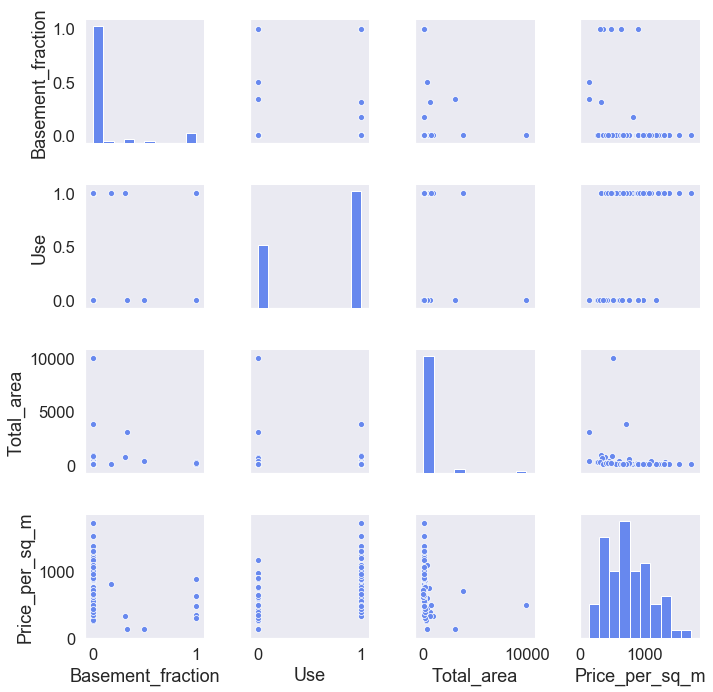

In [83]:
%config InlineBackend.figure_format = 'png' 
sns.pairplot(df[['Basement_fraction','Use', 'Total_area', 'Price_per_sq_m']])

### Зона города

In [12]:
df.groupby('City_zone')['Price_per_sq_m'].describe()

,count,mean,std,min,25%,50%,75%,max
City_zone,,,,,,,,
central,32.0,927.178125,337.388101,346.67,741.0375,897.760,1116.7425,1721.31
middle,16.0,686.523750,330.388621,268.60,392.1225,608.745,943.7500,1379.31
periphery,18.0,490.882778,219.303173,126.58,327.1575,487.615,628.5850,923.08


Распределение выборки объектов по зонам города. Наибольшим количеством объектов коммерческой недвижимости представлена центральная часть города:

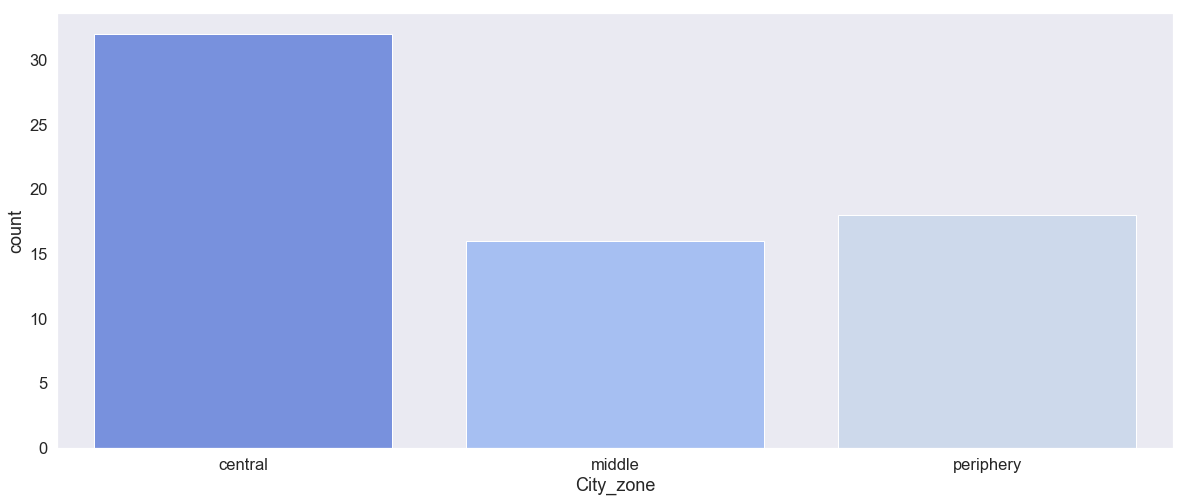

In [40]:
sns.countplot(x='City_zone', data=df);

Стоимость коммерческой недвижимости снижается от центра к периферии:

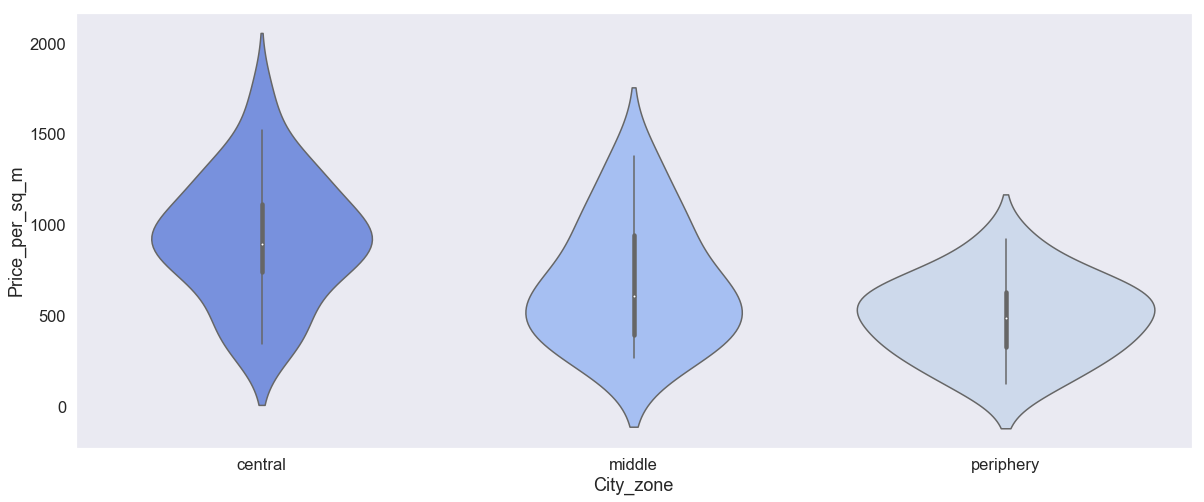

In [41]:
sns.violinplot(x='City_zone', y='Price_per_sq_m', data=df, order=["central", "middle", 'periphery']);

## Функциональное использование

In [15]:
df.groupby('Use')['Price_per_sq_m'].describe()

,count,mean,std,min,25%,50%,75%,max
Use,,,,,,,,
0,23.0,546.597391,286.496023,126.58,337.675,500.00,753.11,1166.97
1,43.0,858.563488,344.933916,322.90,598.085,865.05,1067.95,1721.31


Стоимость торговой недвижимости больше стоимости офисной недвижимости:

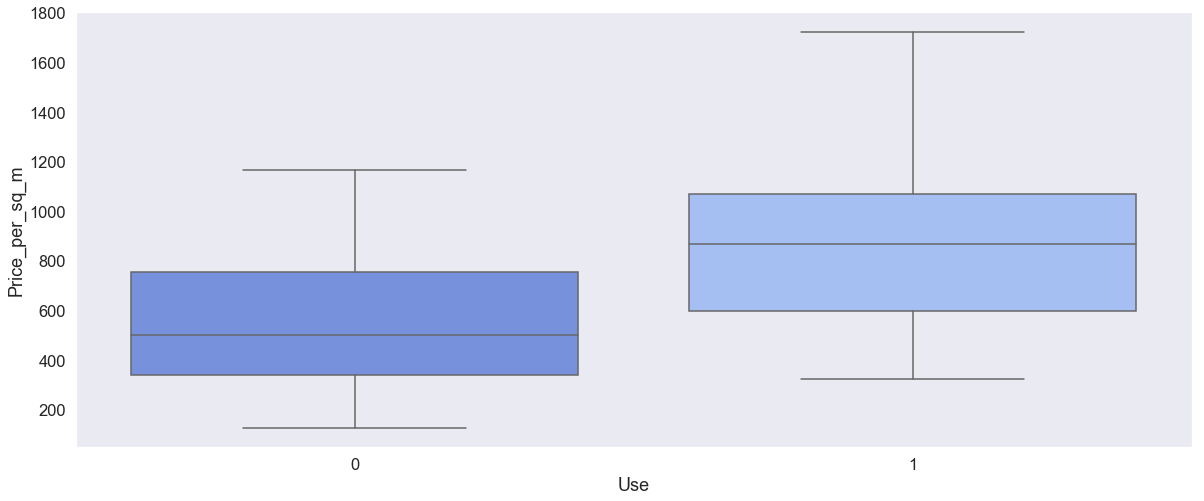

In [42]:
sns.boxplot(x='Use', y='Price_per_sq_m', data=df);

In [17]:
df.groupby(['Use', 'City_zone'])['Price_per_sq_m'].describe()

count         mean         std     min       25%       50%  \
Use City_zone                                                               
0   central     14.0   684.650000  261.861967  346.67  437.5025   696.640   
    middle       3.0   420.370000  171.743404  268.60  327.1550   385.710   
    periphery    6.0   287.588333  166.254184  126.58  162.4475   279.955   
1   central     18.0  1115.811111  262.718699  725.49  905.3300  1067.950   
    middle      13.0   747.943846  331.260597  322.90  549.7500   700.000   
    periphery   12.0   592.530000  167.178738  326.65  473.6100   598.085   

                     75%      max  
Use City_zone                      
0   central     894.4650  1166.97  
    middle      496.2550   606.80  
    periphery   322.5975   578.95  
1   central    1298.8325  1721.31  
    middle     1000.0000  1379.31  
    periphery   681.2100   923.08

Снижение стоимости от центра к периферии наблюдается как для торговой, так и для офисной недвижимости:

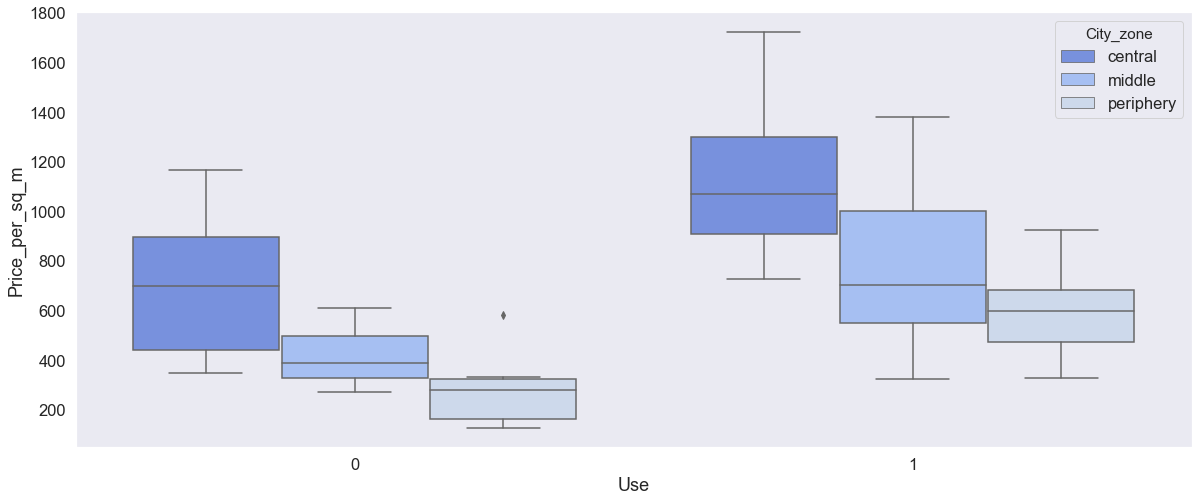

In [43]:
sns.boxplot(x='Use', y='Price_per_sq_m', hue='City_zone', data=df);

## Техническое состояние недвижимости

In [19]:
df.groupby('Technical_condition')['Price_per_sq_m'].describe()

,count,mean,std,min,25%,50%,75%,max
Technical_condition,,,,,,,,
acceptable,17.0,540.562353,195.260914,131.41,433.3300,553.280,657.89,875.00
bad,10.0,392.176000,173.803008,126.58,328.8425,358.135,391.85,751.17
good,25.0,838.601200,263.025386,304.35,647.0600,895.520,992.06,1379.31
very good,14.0,1100.972857,369.211124,493.75,820.3600,1186.555,1307.53,1721.31


Чем лучше техническое состояние недвижимости, тем стоимость выше:

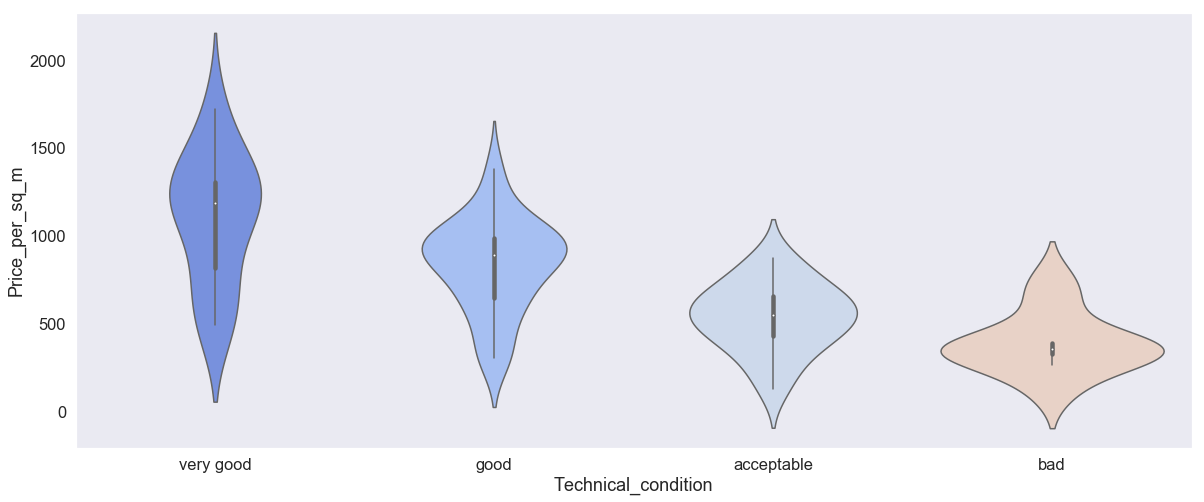

In [44]:
sns.violinplot(x='Technical_condition', y='Price_per_sq_m', data=df, order=["very good", "good", "acceptable", 'bad']);

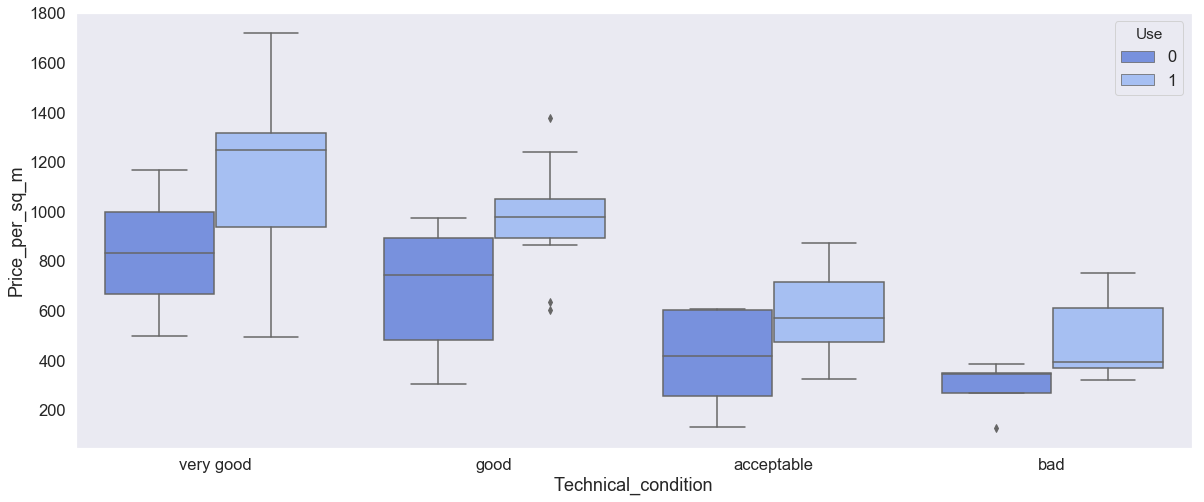

In [45]:
sns.boxplot(x='Technical_condition', y='Price_per_sq_m', hue='Use', data=df, order=["very good", "good", "acceptable", 'bad']);

Распределение количества объектов выборки в зависимости от технического состояния по зонам города. В центральной части больше объектов в хорошем состоянии, для периферийных районов характерно приемлемое состояние:

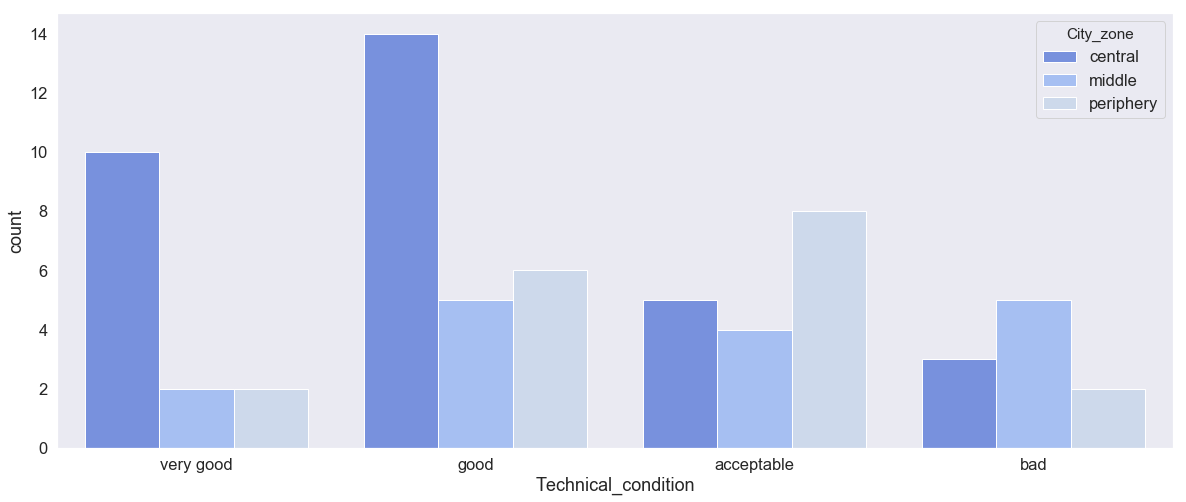

In [46]:
sns.countplot(x='Technical_condition', hue='City_zone', data=df, order=["very good", "good", "acceptable", 'bad']);

## Привлекательность недвижимости на локальном уровне

In [23]:
df.groupby('Local_conditions')['Price_per_sq_m'].describe()

,count,mean,std,min,25%,50%,75%,max
Local_conditions,,,,,,,,
average,31.0,772.802903,312.625569,304.35,551.515,760.00,924.0400,1523.97
good,21.0,940.091429,345.582745,322.90,700.000,976.19,1166.9700,1721.31
unattractive,14.0,413.654286,211.573938,126.58,283.620,366.62,562.2775,891.30


Чем привлекательнее локальные факторы расположения объектов коммерческой недвижимости, тем стоимость выше:

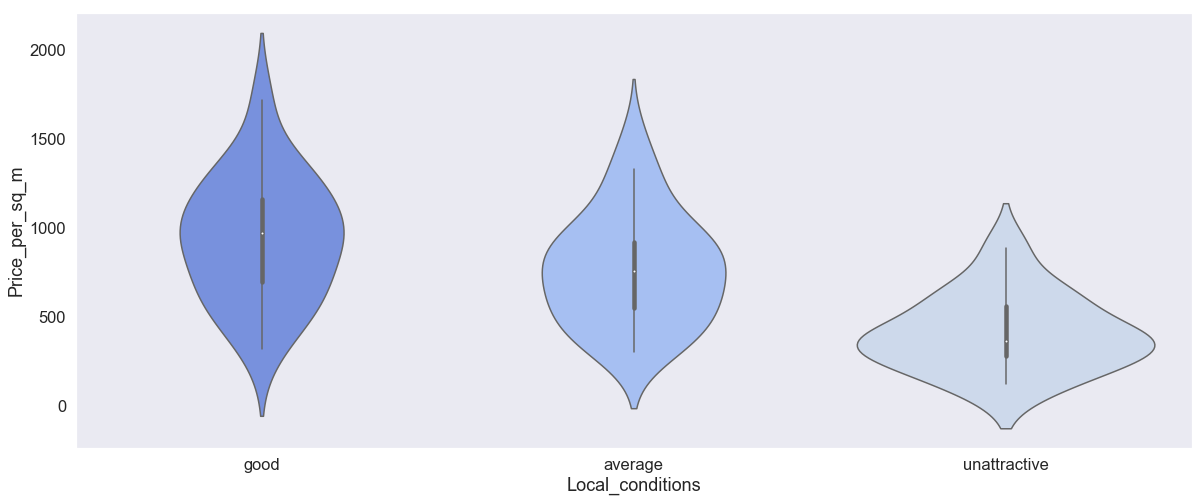

In [47]:
sns.violinplot(x='Local_conditions', y='Price_per_sq_m', data=df, order=["good", "average", "unattractive"]);

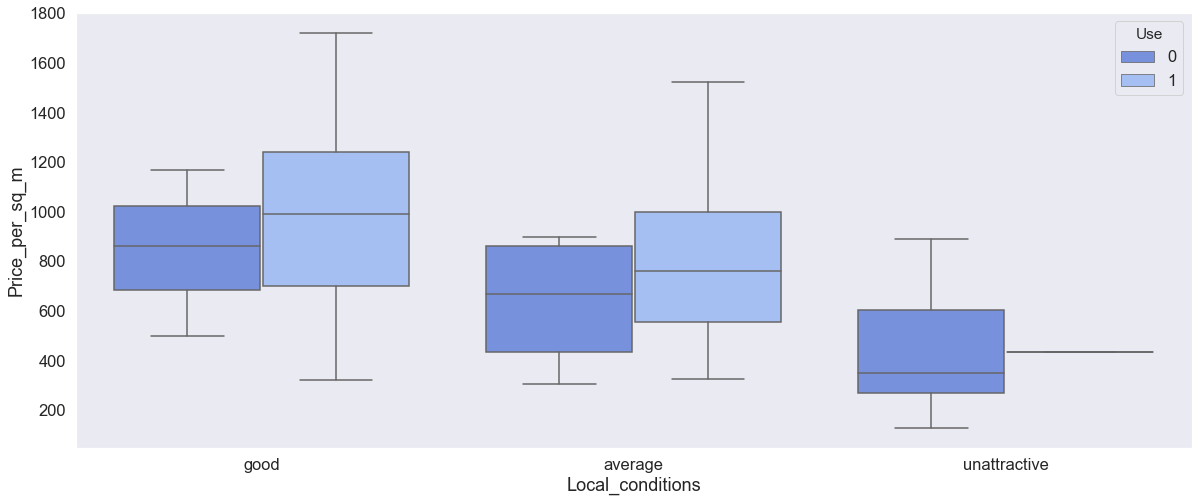

In [48]:
sns.boxplot(x='Local_conditions', y='Price_per_sq_m', hue='Use', data=df, order=["good", "average", 'unattractive']);

Распределение количества объектов в выборке по признакам "Зона города" и "Локальные факторы":

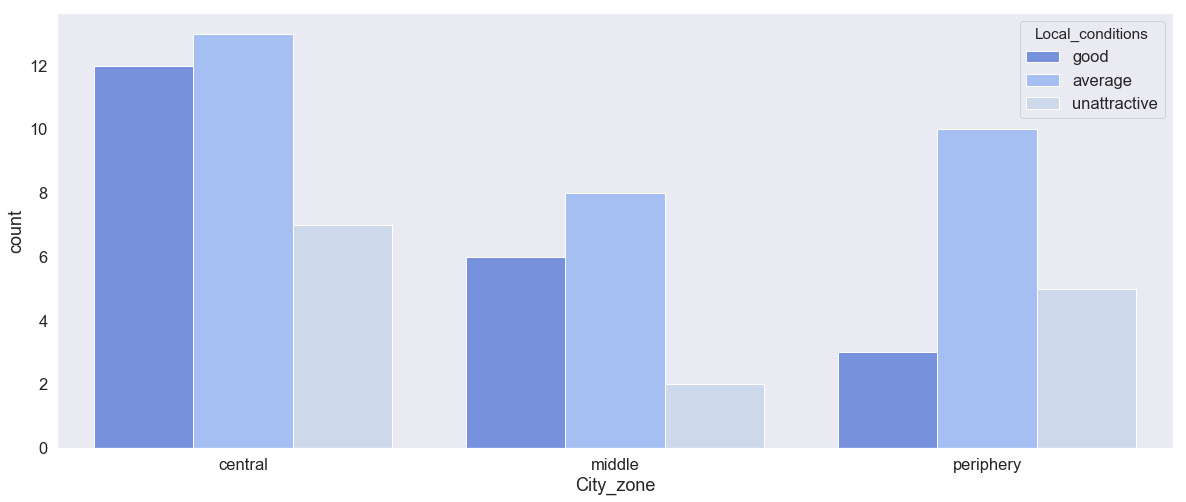

In [49]:
sns.countplot(x='City_zone', hue="Local_conditions", data=df);

## Наличие подвальных (полуподвальных) помещений

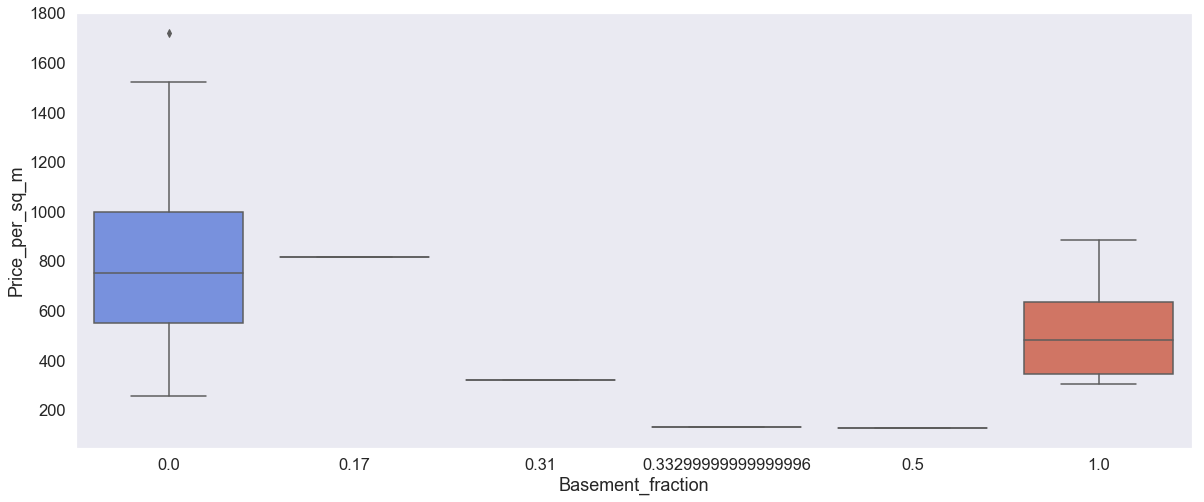

In [50]:
sns.boxplot(x='Basement_fraction', y='Price_per_sq_m', data=df);

## Зависимость удельной цены от общей площади

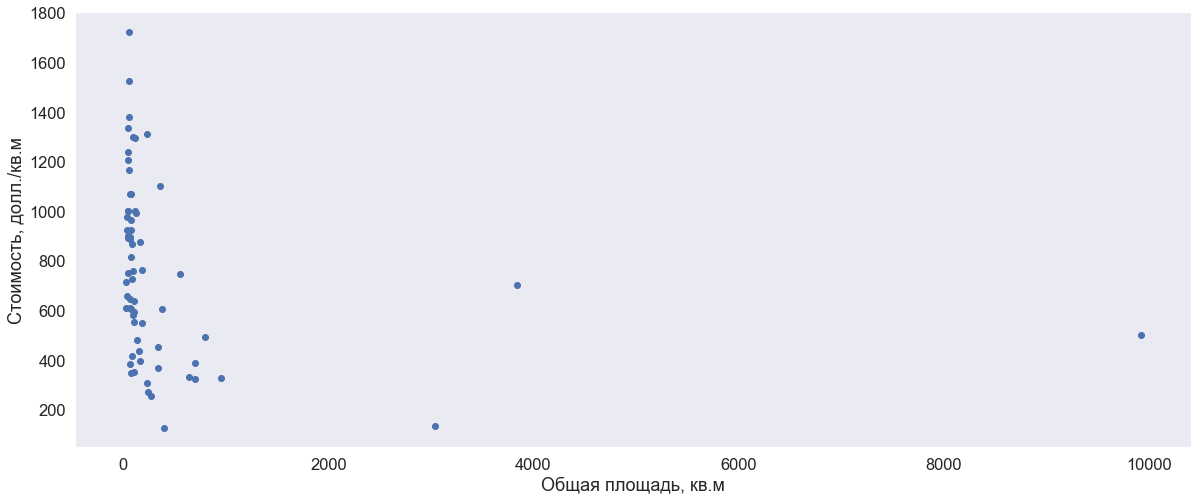

In [126]:
plt.plot(df['Total_area'], df['Price_per_sq_m'], 'bo')
plt.xlabel('Общая площадь, кв.м')
plt.ylabel('Стоимость, долл./кв.м');

разбивка данных по функциональному назначению (офисы - 0, торговое - 1)

In [127]:
office = df[df['Use'] == 0]
comm = df[df['Use'] == 1]

также, для наглядности изображения, уберем объекты недвижимости с очень большими площадями

In [128]:
xo = office[office['Total_area'] < 2000]['Total_area']
yo = office[office['Total_area'] < 2000]['Price_per_sq_m']
xc = comm[comm['Total_area'] < 2000]['Total_area']
yc = comm[comm['Total_area'] < 2000]['Price_per_sq_m']

Наблюдается снижение удельной стоимости коммерческой недвижимсти с увеличением общей площади (справделиво как для торговой, так и для офисной недвижимости):

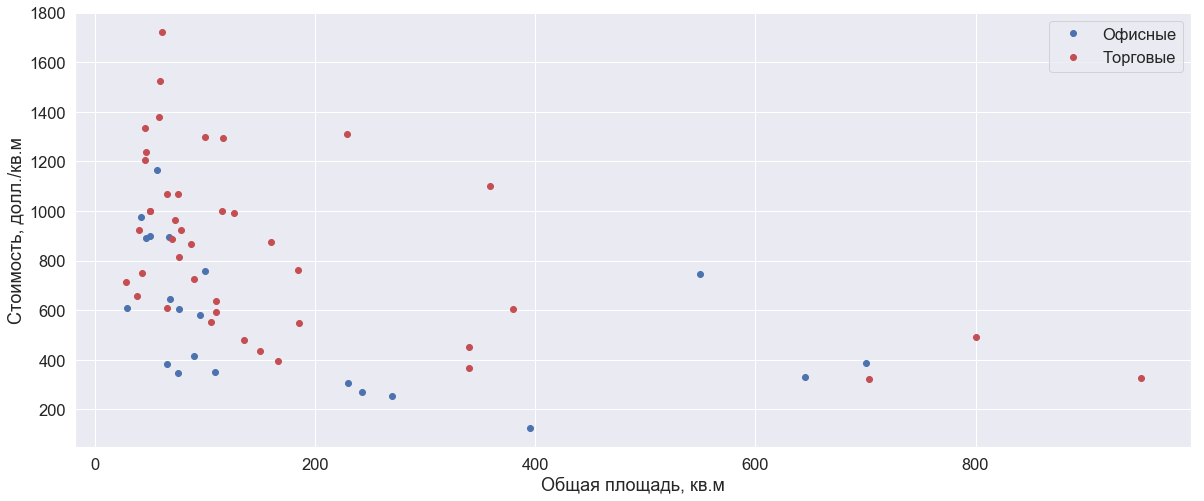

In [129]:
sns.set(font_scale = 1.5, rc = { "figure.figsize" : (20, 8), "axes.titlesize" : 18 })
plt.plot(xo, yo, 'bo')
plt.plot(xc, yc, 'ro')
plt.xlabel('Общая площадь, кв.м')
plt.ylabel('Стоимость, долл./кв.м')
plt.legend(('Офисные', 'Торговые'));

## Функция зависимости стоимости от площади

In [114]:
def hypothesis(x, k, b):
    return k * x + b

In [115]:
def loss_function(k, b, x, y):
    return sum([(y[i] - hypothesis(x[i], k, b)) ** 2 for i in range(len(x))]) / len(x)

In [116]:
def gradient_descent(k, b, alfa, N, x, y):
    for j in range(N):
        loss = loss_function(k, b, x, y)
        k_ = k
        k += alfa / len(x) * sum([(y[i] - hypothesis(x[i], k, b)) * x[i] for i in range(len(x))])
        b += alfa / len(x) * sum([(y[i] - hypothesis(x[i], k_, b)) for i in range(len(x))])
        loss_list.append((j, loss - loss_function(k, b, x, y)))
        theta_list.append((k, b))
    return k, b

In [117]:
x = df[df['Total_area'] < 2000]['Total_area'].tolist()
y = df[df['Total_area'] < 2000]['Price_per_sq_m'].tolist()

In [133]:
alfa = 0.000025
N = 500000
loss_list = []
# начальные значения theta примаются по графическому представлению данных:
a0 = np.mean(df['Price_per_sq_m'][df['Total_area'] <= 100]) # как среднее значение стоимости объектов с малой площадью
a1 = - a0 / max(x) # решение уравнения при у = 0 и максимальном значении площади
print(a1, a0)

-0.9580676691729323 910.1642857142857


In [134]:
theta_list = [(a1, a0)] 
theta = gradient_descent(theta_list[0][0], theta_list[0][1], alfa, N, x, y)

In [135]:
y_ = []
for i in range(len(x)):
    y_.append(hypothesis(x[i], theta[0], theta[1]))

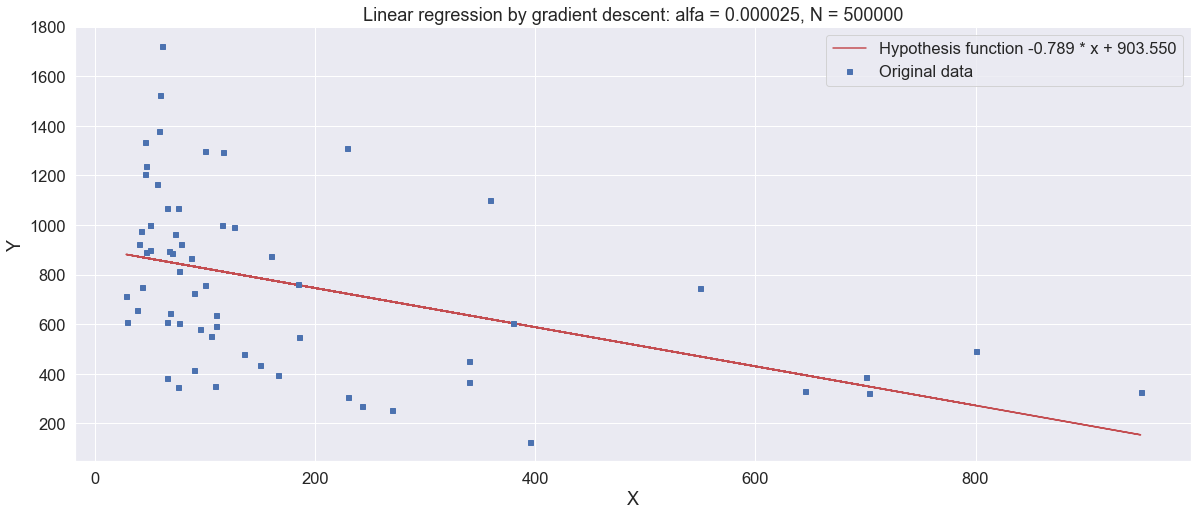

In [136]:
plt.plot(x, y_, 'r', label=('Hypothesis function {:.3f} * x + {:.3f}'.format(theta[0], theta[1])))
plt.plot(x, y, 'bs', label=('Original data'), markersize=5)
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.title('Linear regression by gradient descent: alfa = {:.6f}, N = {:.0f}'.format(alfa, N));

In [85]:
from scipy.stats import linregress
linregress(x,y)

LinregressResult(slope=-0.7893371619330565, intercept=903.5446426329356, rvalue=-0.45468565217075935, pvalue=0.00018138747003180585, stderr=0.19796773865681325)